In [1]:
# Import necessary libraries
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('data.csv', sep=',', index_col=None)
# Showing datset with 3 rows
data[:3]

,QA,PRESCREEN,PT5,PT6,PT7,PT8,PT9,PT10,NORM1,NORM2,NORM3,NORM4,NORM5,NORM6,NORM7,NORM8,EUCLID,DIAMETER,AMFM,CLASS
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1


In [3]:
# Length of data i.e., how many rows are present in dataset
len(data)

2070

In [4]:
# Step 2: Data Preprocessing (Handle missing values and feature engineering here)
# Data Preprocessing

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# If there are missing values, you can handle them. For example, by filling with the mean:
#data.fillna(data.mean(), inplace=True)

Missing Values:
QA           0
PRESCREEN    0
PT5          0
PT6          0
PT7          0
PT8          0
PT9          0
PT10         0
NORM1        0
NORM2        0
NORM3        0
NORM4        0
NORM5        0
NORM6        0
NORM7        0
NORM8        0
EUCLID       0
DIAMETER     0
AMFM         0
CLASS        0
dtype: int64


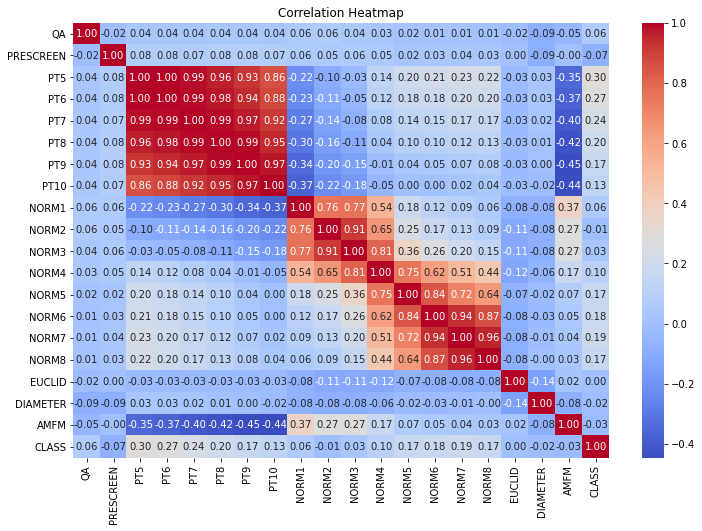

In [5]:
# Step 3: Exploratory Data Analysis (EDA)
# Calculate the correlation matrix and visualize it
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

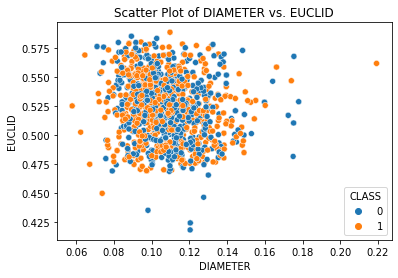

In [6]:
# Create a scatter plot to visualize the relationship between DIAMETER and EUCLID
sns.scatterplot(data=data, x='DIAMETER', y='EUCLID', hue='CLASS')
plt.title('Scatter Plot of DIAMETER vs. EUCLID')
plt.show()

In [7]:
# Step 4: Data Splitting (Custom Approach)

# Custom Data Splitting Approach
# You've chosen to manually split the data into training and testing sets. 
# This is an alternative to using scikit-learn's train_test_split function.

# Create a list of lists, where each sublist contains values from specific columns
temp = [
    [x for x in data['QA']],
    [x for x in data['PRESCREEN']],
    [x for x in data['PT5']],
    [x for x in data['PT8']],
    [x for x in data['PT10']]
]

# Combine the sublists using zip and transpose to get a list of tuples
# Each tuple represents a data point with values from the specified columns
total = [x for x in zip(*temp)]

# Split the combined data into training and testing sets manually
# In this case, you've chosen to take the first 1036 samples for training and the rest for testing.
training = total[:1036]
testing = total[1036:]


# Conventional Data Splitting Approach (Using scikit-learn)
# Instead of the custom approach, you can use scikit-learn's train_test_split function for data splitting.

# Uncomment the following lines to use the conventional approach:

# X = data.drop(columns=['CLASS'])  # Features
# y = data['CLASS']  # Target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In the conventional approach, X_train and X_test will contain the feature vectors,
# and y_train and y_test will contain the corresponding class labels.

In [8]:
# Create dictionaries to organize the data for training and testing
# 'data' contains the feature vectors, and 'labels' contains the corresponding class labels.
actual_data = {
    'data': np.array(training),
    'labels': [x for x in data['CLASS'][:1036]]
}

testing_data = {
    'data': np.array(testing),
    'labels': [x for x in data['CLASS'][1036:]]
}

In [9]:
# Print the first few rows of the training data for reference
actual_data

{'data': array([[ 1,  1, 22, 19, 14],
        [ 1,  1, 24, 18, 13],
        [ 1,  1, 62, 54, 33],
        ...,
        [ 1,  1, 10, 10,  8],
        [ 1,  1, 49, 45, 32],
        [ 1,  1, 22, 19, 14]]),
 'labels': [0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  

In [10]:
# Step 5: Model Selection

# Option 1: Initialize a Decision Tree Classifier without specifying random_state
# In this case, randomness is introduced in the algorithm.
# Use this when you want to explore the impact of randomness or when exact reproducibility is not required.
clf = DecisionTreeClassifier()

# Option 2: Initialize a Decision Tree Classifier with a specific random_state value
# Setting a fixed random_state value (e.g., 42) ensures reproducibility.
# Use this when you need consistent and reproducible results for research, debugging, or documentation. Uncomment the following lines to use
#clf_option2 = DecisionTreeClassifier(random_state=42)

In [11]:
# Step 6: Model Training
clf.fit(actual_data['data'], actual_data['labels'])

DecisionTreeClassifier()

In [12]:
# Step 7: Model Evaluation
# Evaluate your trained model's performance on the testing data.
# Predict the class labels for the first 10 samples in the testing set.
testing[:10], clf.predict(testing)

#Can also be written as following -
#predictions_10_samples = clf.predict(testing_data['data'][:10])

([(1, 1, 24, 18, 13),
  (1, 1, 62, 54, 33),
  (1, 1, 55, 50, 31),
  (1, 1, 44, 41, 27),
  (1, 1, 44, 41, 29),
  (1, 0, 29, 27, 16),
  (1, 1, 6, 6, 1),
  (1, 1, 22, 15, 10),
  (1, 1, 79, 71, 47),
  (1, 1, 45, 43, 32)],
 array([0, 1, 0, ..., 1, 0, 1]))

In [13]:
# Predict the class labels for custom data points.
clf.predict([(1,1,3,3,3), (1,1,33,63,93), (1,1,10,20,30)])

array([0, 1, 0])

In [14]:
# Calculate the accuracy score of the model on the testing data.
accuracy = clf.score(testing_data['data'], testing_data['labels'])
print(accuracy)

0.9632495164410058


In [15]:
# Step 8: Hyperparameter Tuning (Not shown, but can be done to optimize the model)


In [16]:
# Step 9: Cross-Validation (Not shown, but can be done for better evaluation)


In [17]:
# Step 10: Prediction (Already done in Model Evaluation)
# The model has been trained and evaluated. Prediction is implicitly part of the evaluation process.
# You can use the model for making predictions on new, unseen data outside of this script.
# For example, clf.predict(new_data) where new_data is a new dataset with the same features.

# Print the results
print("Predictions for the first 10 samples:", testing[:10], clf.predict(testing))
print("Predictions for custom data points:", clf.predict([(1,1,3,3,3), (1,1,33,63,93), (1,1,10,20,30)]))
print("Model Accuracy on Testing Data:", accuracy)

Predictions for the first 10 samples: [(1, 1, 24, 18, 13), (1, 1, 62, 54, 33), (1, 1, 55, 50, 31), (1, 1, 44, 41, 27), (1, 1, 44, 41, 29), (1, 0, 29, 27, 16), (1, 1, 6, 6, 1), (1, 1, 22, 15, 10), (1, 1, 79, 71, 47), (1, 1, 45, 43, 32)] [0 1 0 ... 1 0 1]
Predictions for custom data points: [0 1 0]
Model Accuracy on Testing Data: 0.9632495164410058
